# Linear Regression: Data Preprocessing

**I use the [Diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) from scikit-learn's toy datasets in this experimentation. Since linear regression is a basic and easily understandable machine learning model, I use linear regression here. But before start implementing and comparing the performances of the optimizers I need to explore, preprocess and visualize the data to get the best relevant features.**

## Load the diabetes dataset and import necessary libraries

In [1]:
#import the diabetes dataset from scikit-learn's toy dataset
from sklearn.datasets import load_diabetes
#import train_test_split to split the dataset into train and test set
from sklearn.model_selection import train_test_split
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#storing the dataset in a variable
dataset = load_diabetes()

## Convert the dataset to a pandas dataframe, check statistics and data preprocessing

In [3]:
#what's inside the dataset?
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
#description of the dataset e.g. number of instances and attributes and information about the attributes etc. 
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
#min and max values of each attribute and the target
for i in range(len(dataset.feature_names)):
    print(f"column {i}: min: {np.min(dataset.data[:, i])} and max: {np.max(dataset.data[:, i])}")
reshaped_target = dataset.target.reshape((442, 1))
print(reshaped_target.shape)
print(f"target: min: {np.min(reshaped_target)} and max: {np.max(reshaped_target)}")

column 0: min: -0.107225631607358 and max: 0.110726675453815
column 1: min: -0.044641636506989 and max: 0.0506801187398187
column 2: min: -0.0902752958985185 and max: 0.17055522598066
column 3: min: -0.112399602060758 and max: 0.132044217194516
column 4: min: -0.126780669916514 and max: 0.153913713156516
column 5: min: -0.115613065979398 and max: 0.198787989657293
column 6: min: -0.10230705051742 and max: 0.181179060397284
column 7: min: -0.076394503750001 and max: 0.185234443260194
column 8: min: -0.126097385560409 and max: 0.133598980013008
column 9: min: -0.137767225690012 and max: 0.135611830689079
(442, 1)
target: min: 25.0 and max: 346.0


In [6]:
#scaling the features and target to the range [0, 1]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(dataset.data)
scaled_target = min_max_scaler.fit_transform(reshaped_target)

In [7]:
#store the dataset as a pandas dataframe
df = pd.DataFrame(data = scaled_data, columns = dataset.feature_names)
#append the target variable
df["Y"] = scaled_target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333,0.342679


In [8]:
#check if there's any missing value
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
Y      0
dtype: int64

In [9]:
#a short summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
#let's check descriptive statistics of the dataset e.g. mean, max, min, std etc. of each feature vector
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459818,0.451668,0.367725,0.360889,0.291996,0.485557,0.503942,0.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357528,0.382576,0.193146
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478057,0.500000,0.359813
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061,0.580997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#randomize the instances before splitting the dataset into train and test set
from sklearn.utils import shuffle
df = shuffle(df, random_state = 9)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
381,0.166667,1.0,0.004132,0.154930,0.299020,0.285857,0.246753,0.282087,0.435853,0.303030,0.246106
392,0.300000,1.0,0.231405,0.450704,0.529412,0.484064,0.402597,0.282087,0.326986,0.742424,0.289720
155,0.366667,1.0,0.578512,0.661972,0.754902,0.642430,0.350649,0.423131,0.631167,0.681818,0.501558
439,0.683333,1.0,0.285124,0.530516,0.318627,0.323705,0.272727,0.249647,0.305040,0.560606,0.333333
331,0.866667,1.0,0.247934,0.309859,0.200980,0.220120,0.220779,0.282087,0.326986,0.484848,0.542056


## Exploratory Data Analysis (EDA) and Feature Engineering

In [12]:
#run functions from another notebook named plot-functions.ipynb
%run plot-functions.ipynb

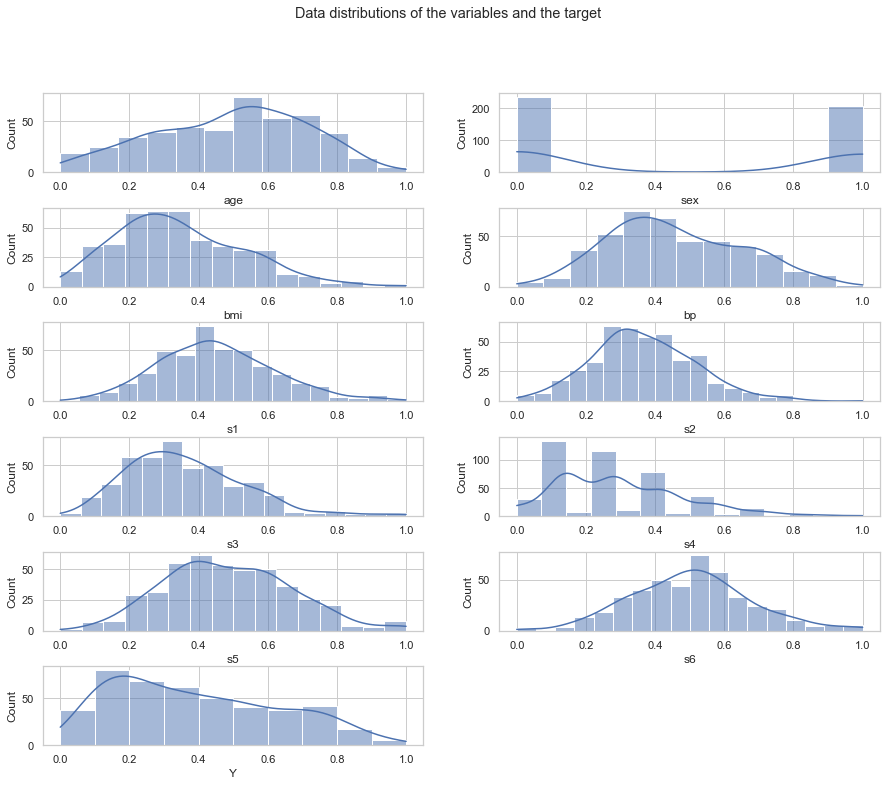

In [13]:
histplot(6, 2, df, "whitegrid", hspace = 0.45)

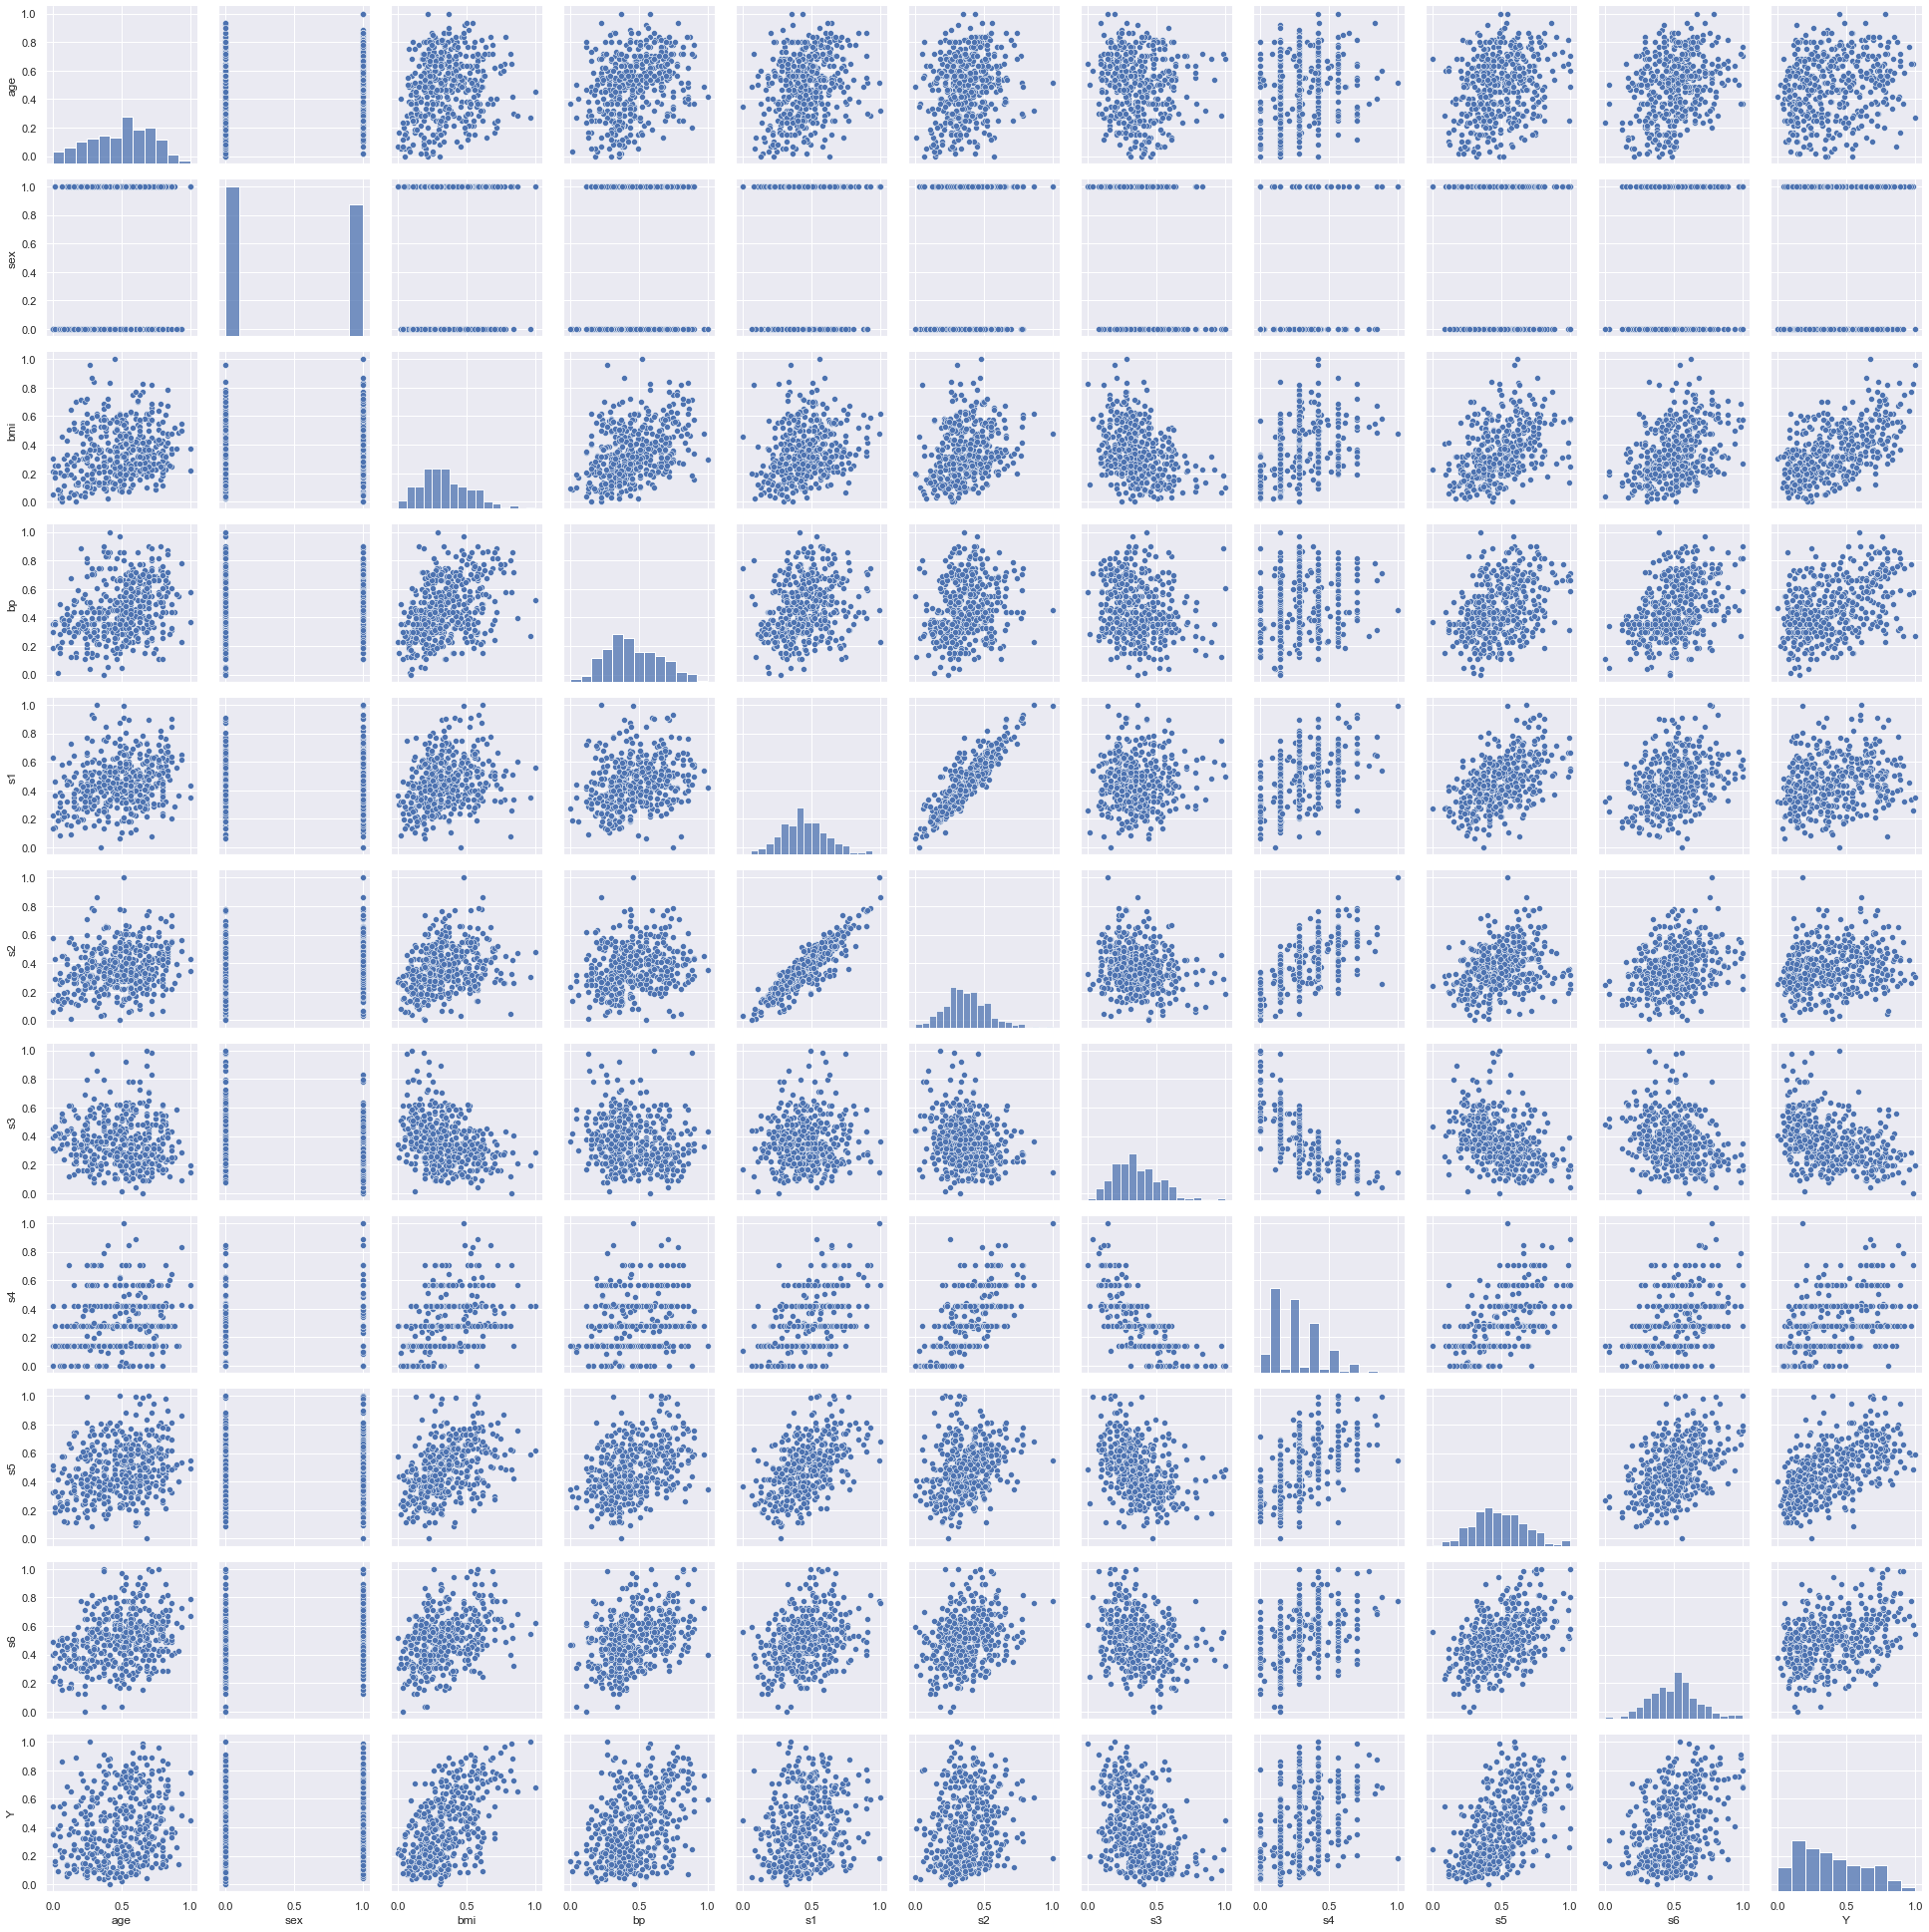

In [14]:
#pairwise relationship between the variables and the target
sns.set_theme(style = "darkgrid")
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

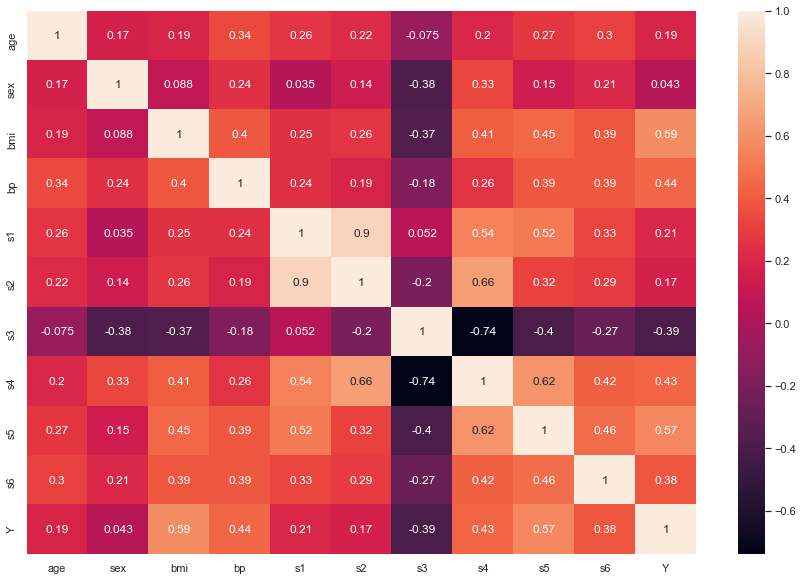

In [15]:
#correlation matrix visualize the linear relationship between the variables and target
sns.set(rc = {"figure.figsize": (15, 10)})
corr_matrix = df.corr()
sns.heatmap(data = corr_matrix, annot = True)
plt.show()
#prints the values inside the squares if annot is True
#the correlation coeffcient ranges from -1 to 1
#if the value is close to 1, there's a strong positive correlation between the variables
#there's a strong negative correlation if the value is close to -1

**We should choose the variables that are highly correlated with the target variable. But always check for multi-co-linearity while choosing the attributes. If two features are highly correlated with the target and those two are strongly correlated with each other then choose one of those, not both. In this dataset two features are highly correlated (>0.5) with the target: "bmi" and "s5". Correlation between "bmi" and "s5" is 0.45 (<0.5). So I consider both variables.**

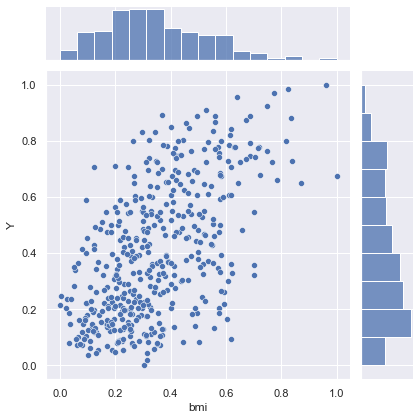

In [16]:
temp_df0 = pd.concat((df["bmi"], df["Y"]), axis = 1)
temp_df1 = pd.concat((df["s5"], df["Y"]), axis = 1)
sns.jointplot(data = temp_df0, x = "bmi", y = "Y")
plt.show()

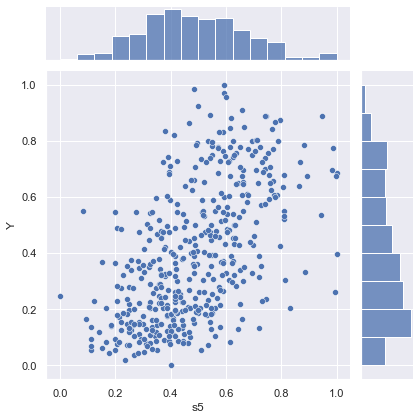

In [17]:
sns.jointplot(data = temp_df1, x = "s5", y = "Y")
plt.show()

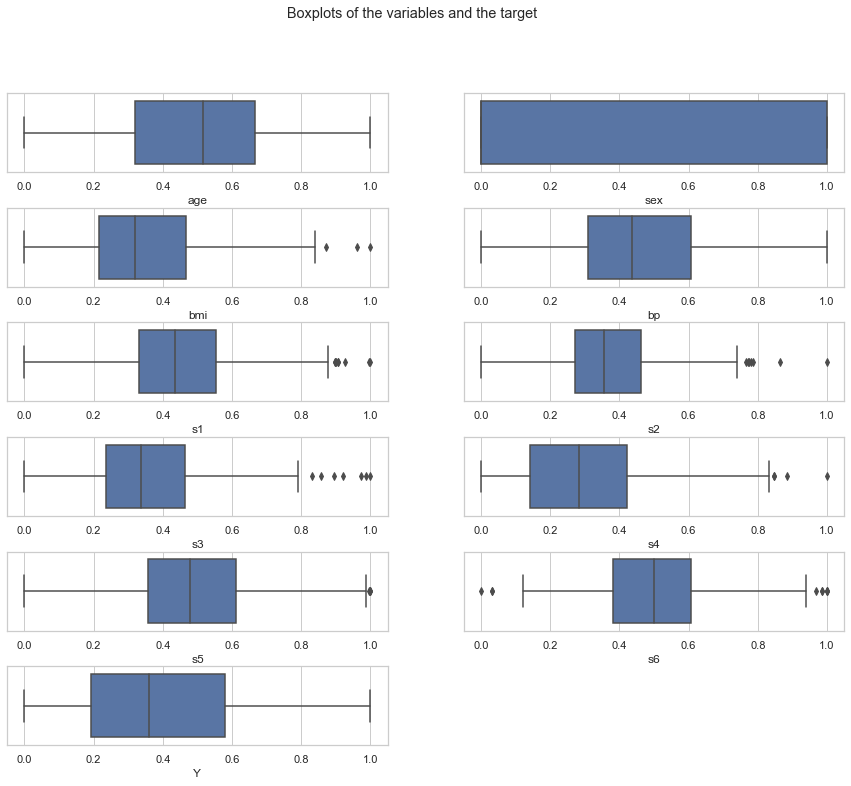

In [18]:
boxplot(6, 2, df, "whitegrid", hspace = 0.45)

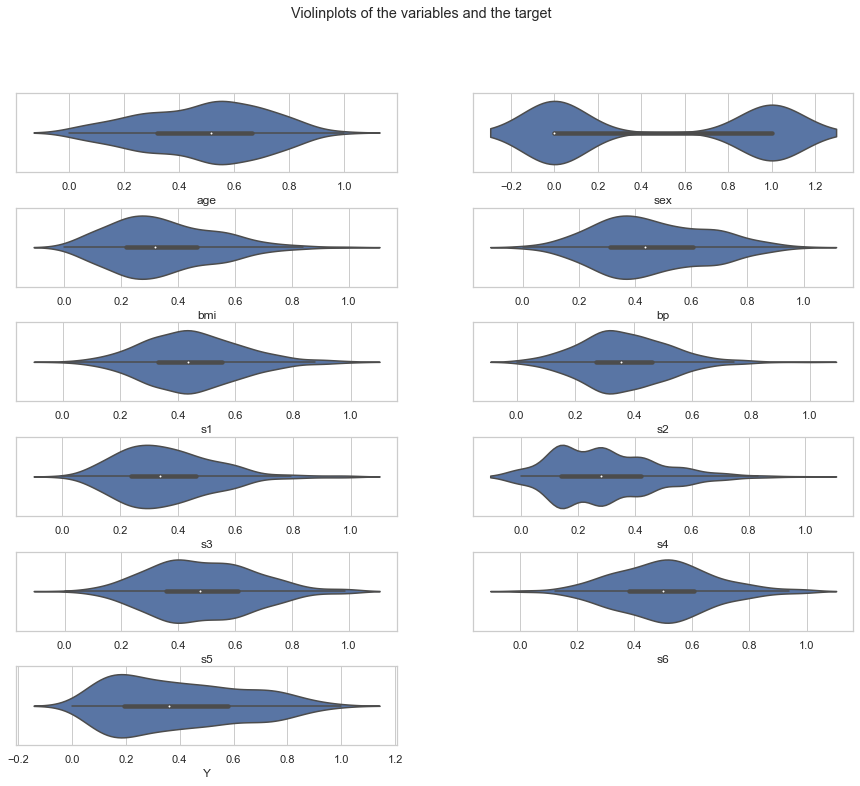

In [19]:
violinplot(6, 2, df, "whitegrid", hspace = 0.45)

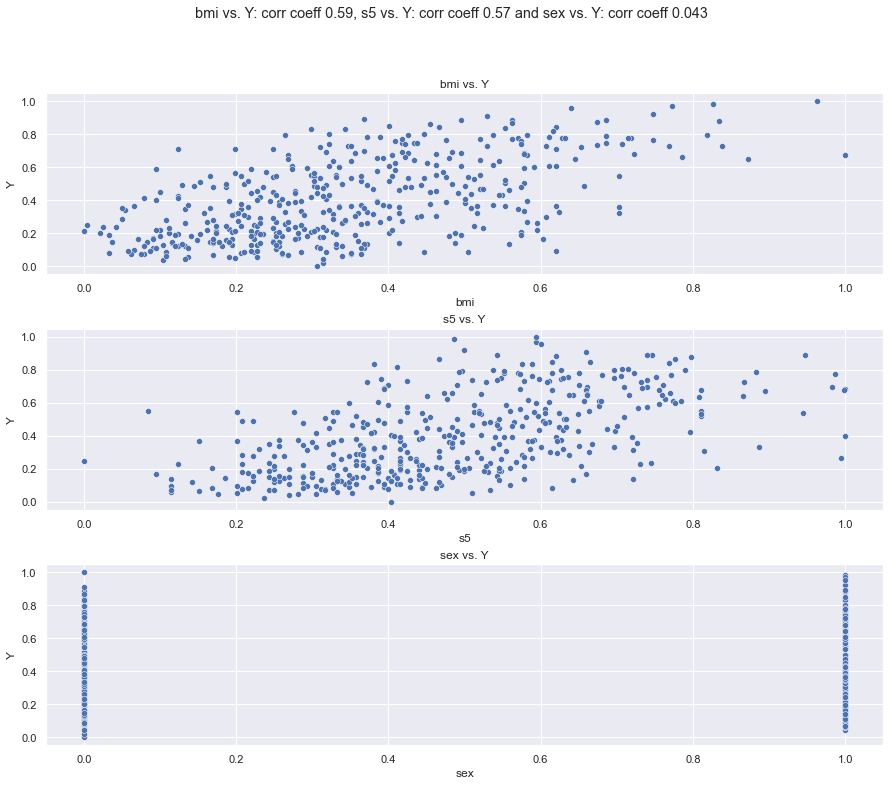

In [20]:
#"bmi" and "s5" are the best options since both of the feature is highly correlated with the target variable "Y"
#the correlation between "bmi" and "Y" is 0.59 and correlation between "s5" and "Y" is 0.57 (strong positive correlation)
sns.set_theme(style = "darkgrid")
fig, axes = plt.subplots(3)
plt.subplots_adjust(hspace = 0.3)
sns.scatterplot(x = df["bmi"], y = df["Y"], ax = axes[0]).set_title("bmi vs. Y")
sns.scatterplot(x = df["s5"], y = df["Y"], ax = axes[1]).set_title("s5 vs. Y")
sns.scatterplot(x = df["sex"], y = df["Y"], ax = axes[2]).set_title("sex vs. Y")
plt.suptitle("bmi vs. Y: corr coeff 0.59, s5 vs. Y: corr coeff 0.57 and sex vs. Y: corr coeff 0.043")
plt.show()

In [21]:
X = pd.concat((df["bmi"], df["s5"]), axis = 1)
X.head()

,bmi,s5
381,0.004132,0.435853
392,0.231405,0.326986
155,0.578512,0.631167
439,0.285124,0.305040
331,0.247934,0.326986


In [22]:
y = pd.DataFrame(df["Y"])
y.tail()

,Y
56,0.084112
438,0.246106
126,0.230530
348,0.383178
382,0.333333


In [23]:
#split the dataset into train and test set
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size = 0.2)
#test_size = 0.2 means 20% of the data will be used for testing

In [24]:
print(X_train0.shape, y_train0.shape)
print(X_test0.shape, y_test0.shape)

(353, 2) (353, 1)
(89, 2) (89, 1)


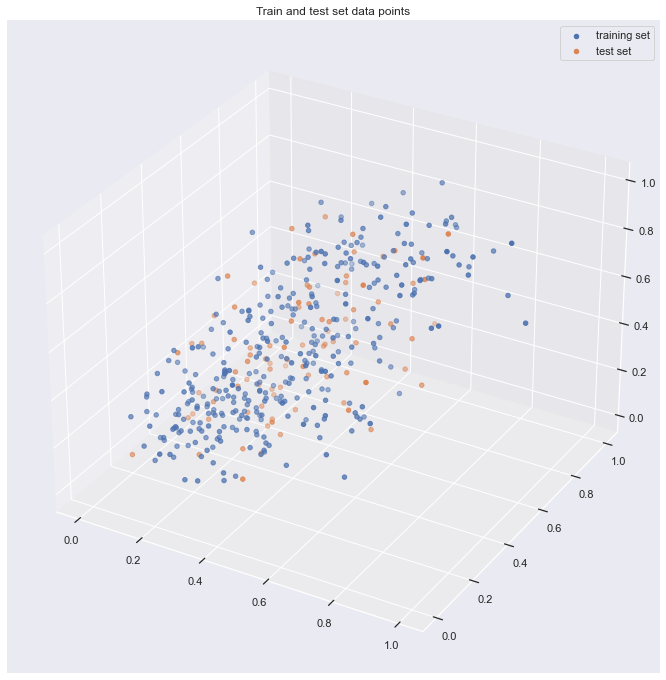

In [25]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.set_title("Train and test set data points")
ax.scatter3D(X_train0["bmi"], X_train0["s5"], y_train0)
ax.scatter3D(X_test0["bmi"], X_test0["s5"], y_test0)
plt.legend(["training set", "test set"])
plt.show()

In [26]:
#store the data to use in another notebook
#write %store -r in another notebook to retrieve the data from the notebook
%store X_train0 y_train0 X_test0 y_test0

Stored 'X_train0' (DataFrame)
Stored 'y_train0' (DataFrame)
Stored 'X_test0' (DataFrame)
Stored 'y_test0' (DataFrame)
